In [1]:
import pandas as pd
from functools import partial, reduce
import re
#process oil dataset
oil_df = pd.read_csv("data/crude-oil-price.csv")
oil_df['Year'] = oil_df['date'].str.slice(0,4)
oil_df['Year'] = oil_df['Year'].astype(int)
oil_df = oil_df[['Year', 'price', 'percentChange', 'change']]
print(oil_df)

    

     Year   price  percentChange  change
0    1983   29.27            NaN     NaN
1    1983   30.63       4.646396    1.36
2    1983   30.25      -1.240614   -0.38
3    1983   31.38       3.735537    1.13
4    1983   32.00       1.975781    0.62
..    ...     ...            ...     ...
464  2021   65.85     -19.479090  -15.93
465  2021   74.88      13.712984    9.03
466  2022   86.49      15.504808   11.61
467  2022   93.50       8.104983    7.01
468  2022  107.82      15.315508   14.32

[469 rows x 4 columns]


In [2]:
oil_grouped_df = oil_df.groupby('Year').agg(['mean'])
oil_grouped_df.columns = ['price','percentChange','change']
# oil_price = oil_grouped_df[['price']]
# oil_grouped_df = oil_grouped_df.reset_index()
print(oil_grouped_df)

          price  percentChange     change
Year                                     
1983  30.468000       0.165252   0.036667
1984  29.240833      -0.883079  -0.265833
1985  27.873333       0.068517  -0.009167
1986  14.413333      -0.904541  -0.696667
1987  19.036667      -0.341533  -0.103333
1988  15.974167       0.626624   0.045000
1989  19.573333       2.136108   0.381667
1990  24.795833       3.662265   0.551667
1991  21.093333      -2.827253  -0.776667
1992  20.554167       0.229934   0.031667
1993  18.515000      -2.511028  -0.444167
1994  17.396667       2.101095   0.299167
1995  18.419167       0.906782   0.149167
1996  21.725000       2.612980   0.530833
1997  20.379167      -2.957262  -0.690000
1998  14.534167      -2.612317  -0.465833
1999  19.638333       7.137722   1.129167
2000  29.744167       1.153613   0.100000
2001  25.238333      -2.254679  -0.580000
2002  26.562500       4.211013   0.946667
2003  30.837500       0.781509   0.110000
2004  41.598333       2.826728   0

In [3]:
#process conflicts
conf_df = pd.read_csv("data/ucdp-prio-acd-211.csv")
print(conf_df)
proc_conf_df = conf_df[['location', 'year', 'intensity_level', 'type_of_conflict']]
print(proc_conf_df)

      conflict_id         location                         side_a side_a_id  \
0           11342            India            Government of India       141   
1           11342            India            Government of India       141   
2           11343    Egypt, Israel            Government of Egypt       117   
3           11343    Egypt, Israel            Government of Egypt       117   
4           11343    Egypt, Israel            Government of Egypt       117   
...           ...              ...                            ...       ...   
2501          440  Myanmar (Burma)  Government of Myanmar (Burma)       144   
2502          440  Myanmar (Burma)  Government of Myanmar (Burma)       144   
2503          440  Myanmar (Burma)  Government of Myanmar (Burma)       144   
2504          440  Myanmar (Burma)  Government of Myanmar (Burma)       144   
2505          442       Mauritania       Government of Mauritania        74   

                side_a_2nd                side_b si

In [4]:
print(proc_conf_df)
proc_conf_df['location'] = proc_conf_df['location'].astype(str)
procloc_df = proc_conf_df.location.str.split(',').apply(pd.Series)
procloc_df.index = proc_conf_df.index
procloc_df.stack().reset_index()
print(procloc_df)

             location  year  intensity_level  type_of_conflict
0               India  2012                1                 3
1               India  2014                1                 3
2       Egypt, Israel  1967                2                 2
3       Egypt, Israel  1969                1                 2
4       Egypt, Israel  1970                1                 2
...               ...   ...              ...               ...
2501  Myanmar (Burma)  1979                1                 3
2502  Myanmar (Burma)  1980                1                 3
2503  Myanmar (Burma)  1981                1                 3
2504  Myanmar (Burma)  1982                1                 3
2505       Mauritania  2010                1                 4

[2506 rows x 4 columns]


/var/folders/r0/q4s0l4t94_q1phdvkpj0321h0000gn/T/ipykernel_95157/3861086171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_conf_df['location'] = proc_conf_df['location'].astype(str)


                    0        1    2    3    4    5
0               India      NaN  NaN  NaN  NaN  NaN
1               India      NaN  NaN  NaN  NaN  NaN
2               Egypt   Israel  NaN  NaN  NaN  NaN
3               Egypt   Israel  NaN  NaN  NaN  NaN
4               Egypt   Israel  NaN  NaN  NaN  NaN
...               ...      ...  ...  ...  ...  ...
2501  Myanmar (Burma)      NaN  NaN  NaN  NaN  NaN
2502  Myanmar (Burma)      NaN  NaN  NaN  NaN  NaN
2503  Myanmar (Burma)      NaN  NaN  NaN  NaN  NaN
2504  Myanmar (Burma)      NaN  NaN  NaN  NaN  NaN
2505       Mauritania      NaN  NaN  NaN  NaN  NaN

[2506 rows x 6 columns]


In [5]:
def get_single_location(row):
    str_row = row.split(',')[0]
    str_row = str_row.split('(')[0]
    return str_row.strip()

In [6]:
proc_loc = proc_conf_df.apply(lambda x: get_single_location(x.location), axis=1)
proc_conf_df['location'] = proc_loc
# proc_conf_df = proc_conf_df.set_index(['location'])
print(proc_conf_df)

        location  year  intensity_level  type_of_conflict
0          India  2012                1                 3
1          India  2014                1                 3
2          Egypt  1967                2                 2
3          Egypt  1969                1                 2
4          Egypt  1970                1                 2
...          ...   ...              ...               ...
2501     Myanmar  1979                1                 3
2502     Myanmar  1980                1                 3
2503     Myanmar  1981                1                 3
2504     Myanmar  1982                1                 3
2505  Mauritania  2010                1                 4

[2506 rows x 4 columns]


/var/folders/r0/q4s0l4t94_q1phdvkpj0321h0000gn/T/ipykernel_95157/13122301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  proc_conf_df['location'] = proc_loc


In [7]:
proc_conf_df = proc_conf_df.rename(columns={'location': 'Entity', 'year': 'Year'})
# proc_conf_df = (proc_conf_df[(proc_conf_df['intensity_level'] == 2) & (proc_conf_df['type_of_conflict'] == 1)])
proc_conf_df = proc_conf_df.sort_values(by='Year')
print(proc_conf_df)
proc_conf_grouped_df = proc_conf_df.groupby(['Entity'])
# proc_conf_grouped_df = proc_conf_grouped_df.set_index(['Year'])
proc_conf_grouped_df.count()
# proc_conf_df = proc_conf_df.reset_index()

            Entity  Year  intensity_level  type_of_conflict
285         Russia  1946                1                 3
226    Philippines  1946                2                 3
197           Iran  1946                1                 4
216           Iran  1946                1                 4
288         Russia  1946                1                 3
...            ...   ...              ...               ...
2214       Algeria  2020                1                 3
169       DR Congo  2020                1                 4
138   Burkina Faso  2020                1                 4
1163       Burundi  2020                1                 4
580          Yemen  2020                2                 4

[2506 rows x 4 columns]


,Year,intensity_level,type_of_conflict
Entity,,,
Afghanistan,51,51,51
Albania,1,1,1
Algeria,40,40,40
Angola,56,56,56
Argentina,7,7,7
...,...,...,...
Uzbekistan,3,3,3
Venezuela,3,3,3
Vietnam,9,9,9


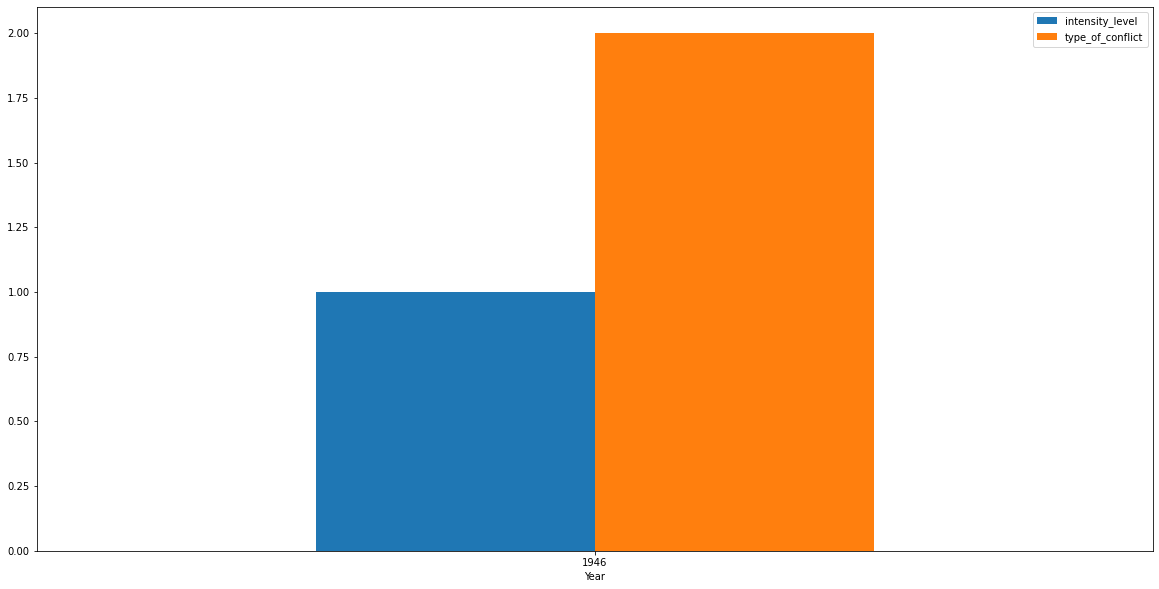

In [8]:
proc_v = proc_conf_df[(proc_conf_df['Entity'] == 'Albania')]
b_plot = proc_v.plot.bar(x='Year', rot=0, figsize=(20,10))

<AxesSubplot:xlabel='Year'>

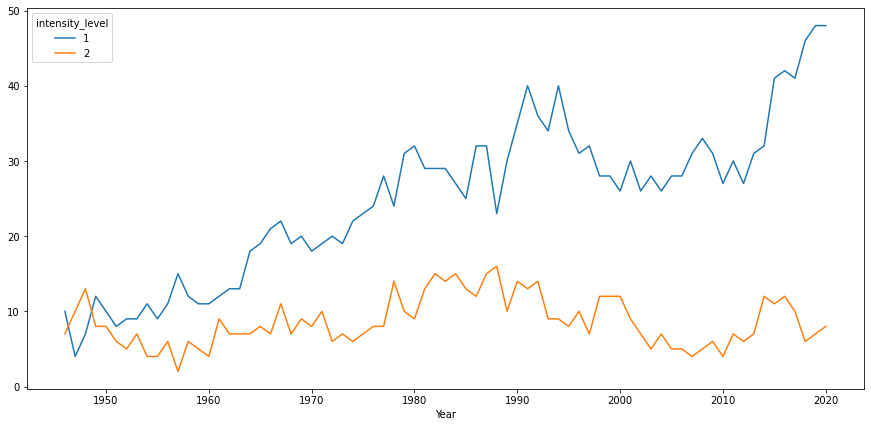

In [9]:
# plot data
import matplotlib.pyplot as matplot
fig, ax = matplot.subplots(figsize=(15,7))
# use unstack()
proc_conf_df.groupby(['Year','intensity_level']).count()['Entity'].unstack().plot(ax=ax)

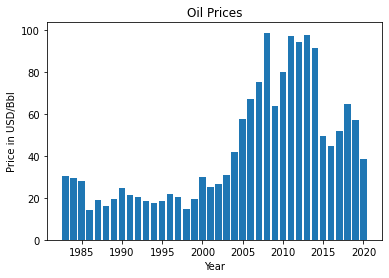

<Figure size 21600x21600 with 0 Axes>

In [10]:
proc_conf_grouped_df1 = proc_conf_df.groupby(['Year']).head(1)
proc_conf_grouped_df1 = proc_conf_grouped_df1.set_index(['Year'])
join_dfs = proc_conf_grouped_df1.join(oil_grouped_df, on='Year', how='left', lsuffix='_proc', rsuffix='_oil')
join_dfs = join_dfs.reset_index()
matplot.bar(join_dfs['Year'], join_dfs['price'])
matplot.title('Oil Prices')
matplot.xlabel('Year')
matplot.ylabel('Price in USD/Bbl') 
matplot.figure(figsize=(300,300))
# matplot.scatter(join_dfs['Year'], join_dfs['price'])
matplot.show()

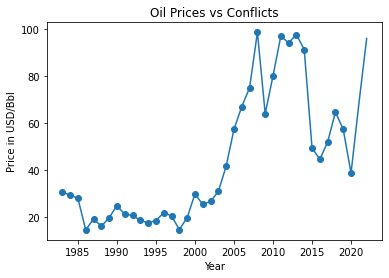

In [11]:
# oil_grouped_df = oil_grouped_df.reset_index()
matplot.plot(oil_grouped_df.index, oil_grouped_df['price'])
matplot.title('Oil Prices vs Conflicts')
matplot.xlabel('Year')
matplot.ylabel('Price in USD/Bbl') 
matplot.scatter(join_dfs['Year'], join_dfs['price'])
matplot.show()

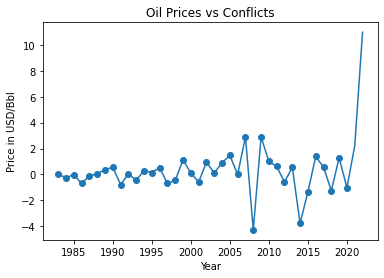

In [14]:

matplot.plot(oil_grouped_df.index, oil_grouped_df['change'])
matplot.title('Oil Price change vs Conflicts')
matplot.xlabel('Year')
matplot.ylabel('') 
matplot.scatter(join_dfs['Year'], join_dfs['change'])
matplot.show()

In [16]:
proc_conf_df3 = proc_conf_df
oil_df1 = oil_grouped_df.reset_index()
merged_proc_conf_df = proc_conf_df3.merge(oil_df1, on='Year', how='left')
print(merged_proc_conf_df)

            Entity  Year  intensity_level  type_of_conflict      price  \
0           Russia  1946                1                 3        NaN   
1      Philippines  1946                2                 3        NaN   
2             Iran  1946                1                 4        NaN   
3             Iran  1946                1                 4        NaN   
4           Russia  1946                1                 3        NaN   
...            ...   ...              ...               ...        ...   
2501       Algeria  2020                1                 3  38.595833   
2502      DR Congo  2020                1                 4  38.595833   
2503  Burkina Faso  2020                1                 4  38.595833   
2504       Burundi  2020                1                 4  38.595833   
2505         Yemen  2020                2                 4  38.595833   

      percentChange    change  
0               NaN       NaN  
1               NaN       NaN  
2              

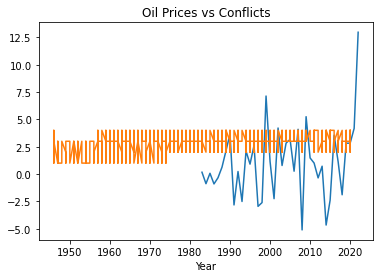

In [26]:
matplot.plot(oil_grouped_df.index, oil_grouped_df['percentChange'])
matplot.title('Oil Prices vs Conflicts')
matplot.xlabel('Year')
matplot.ylabel('') 
matplot.plot(merged_proc_conf_df['Year'], merged_proc_conf_df['type_of_conflict'])
matplot.show()

In [51]:
merged_conf_0510 = merged_proc_conf_df[(merged_proc_conf_df['Year'] >= 2005) & (merged_proc_conf_df['Year'] < 2010)]
print(merged_conf_0510)
merged_conf_0510 = merged_conf_0510.reset_index()
'''merged_conf_0510 = merged_conf_0510.groupby(['Entity'])
merged_conf_0510.count()'''


                        Entity  Year  intensity_level  type_of_conflict  \
1827                 Sri Lanka  2005                1                 3   
1828                     Nepal  2005                2                 3   
1829                  Ethiopia  2005                1                 3   
1830                     India  2005                1                 3   
1831  United States of America  2005                1                 4   
...                        ...   ...              ...               ...   
1998                      Peru  2009                1                 3   
1999                   Myanmar  2009                1                 3   
2000                      Iran  2009                1                 3   
2001                    Angola  2009                1                 3   
2002                  Colombia  2009                1                 3   

          price  percentChange    change  
1827  57.284167       3.172473  1.465833  
1828  57.2841

"merged_conf_0510 = merged_conf_0510.groupby(['Entity'])\nmerged_conf_0510.count()"

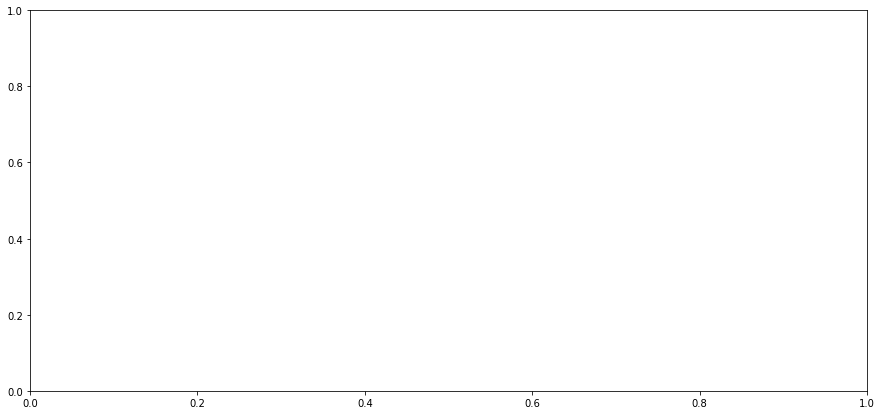

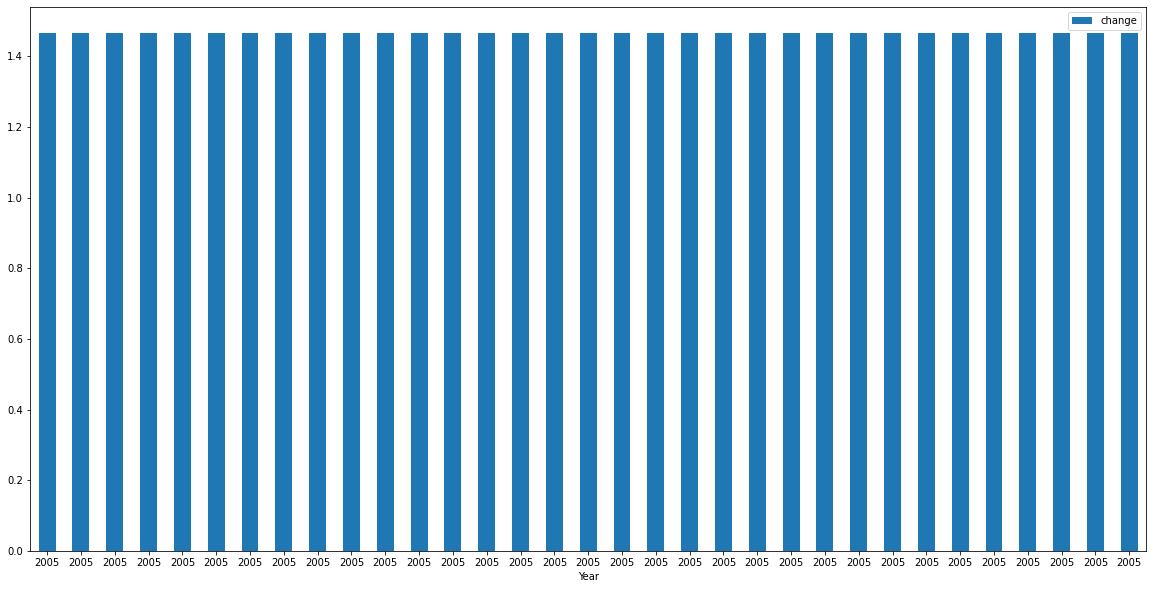

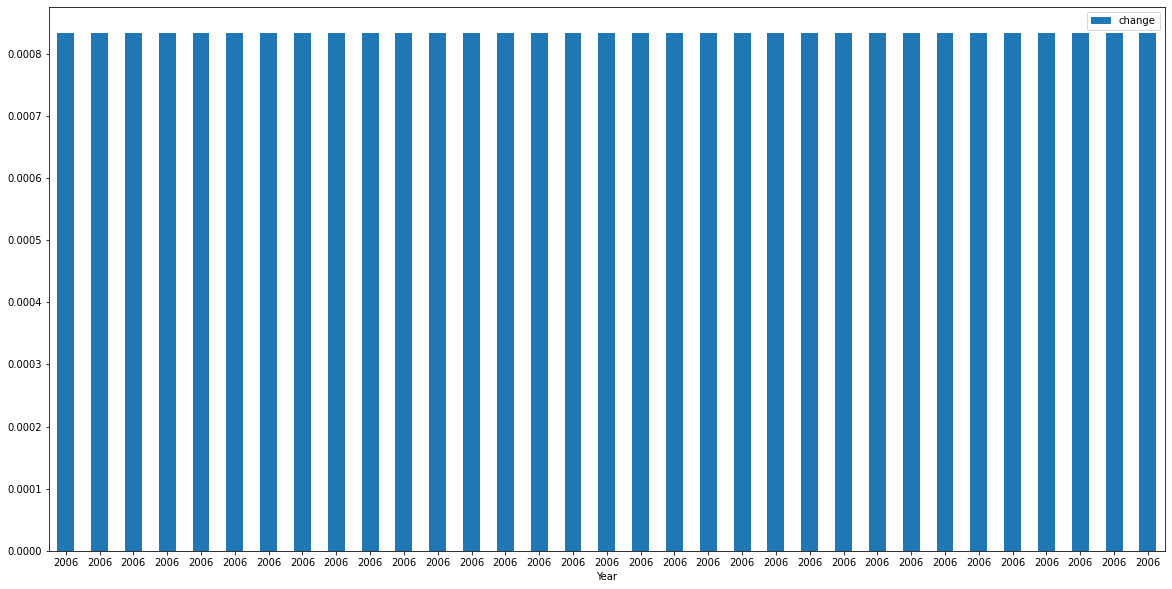

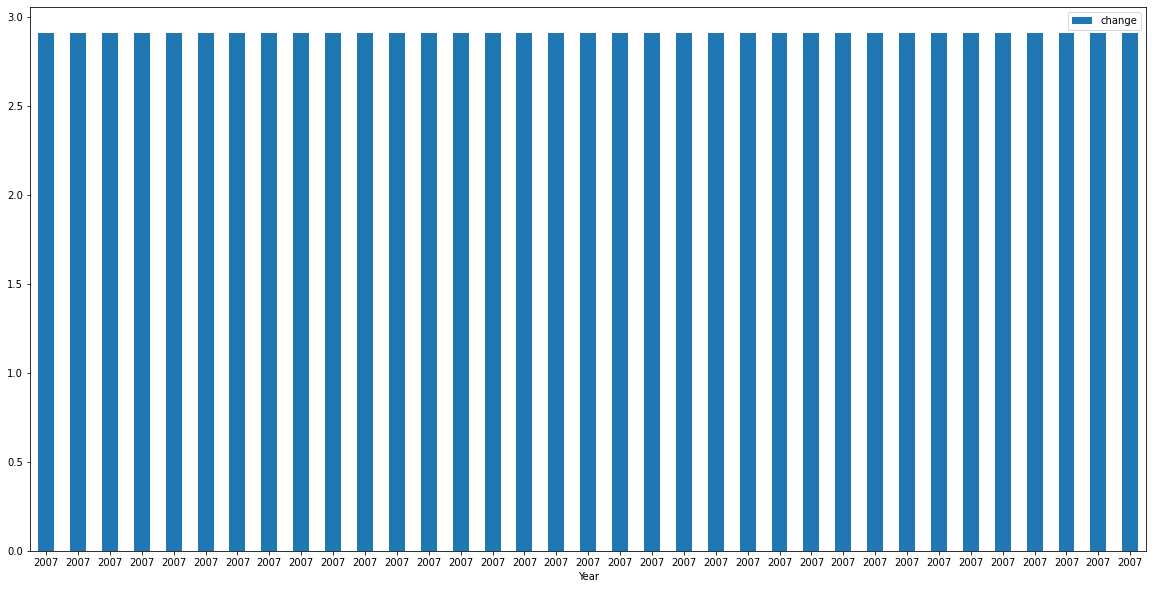

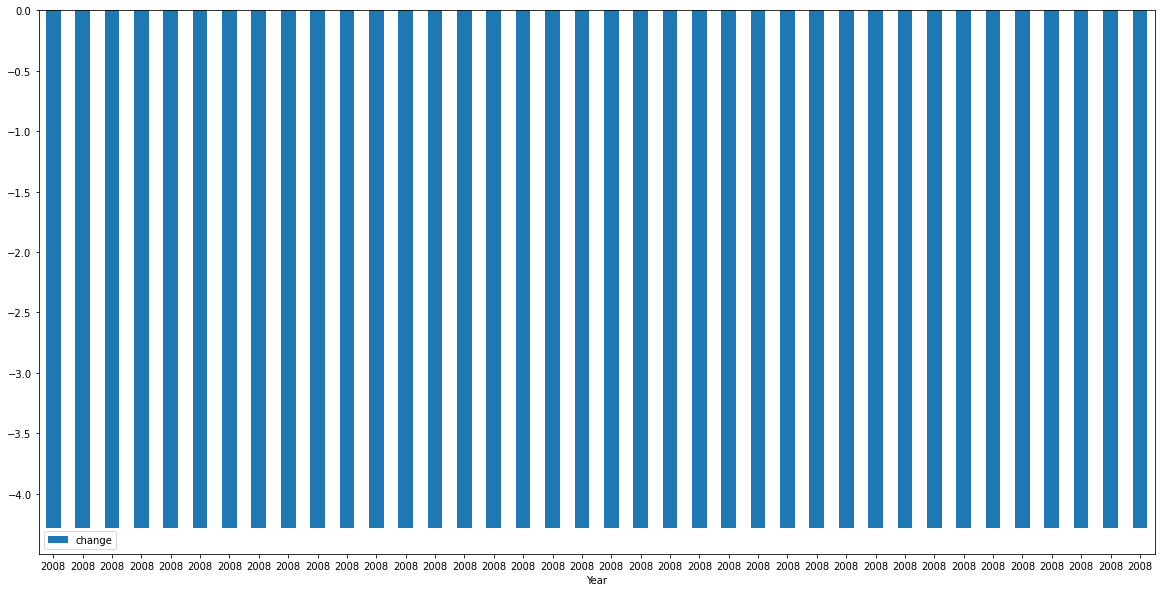

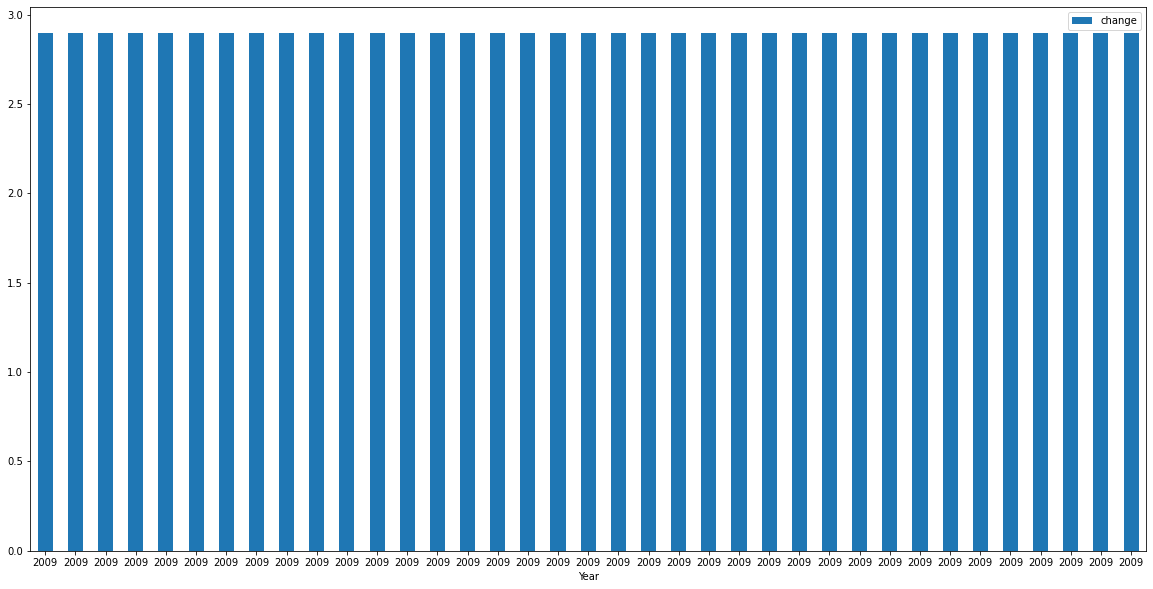

In [55]:
fig, ax = matplot.subplots(figsize=(15,7))
# use unstack()
# merged_conf_0510.groupby('Year').unstack().plot(ax=ax)
merged_conf_0510_year = merged_conf_0510.groupby(['Year'])
b1_plot = merged_conf_0510_year.plot.bar(x='Year', y='change', rot=0, figsize=(20,10))

      Entity      price
Year                   
2005      33  57.284167
2006      33  66.961667
2007      35  74.944167
2008      38  98.583333
2009      37  63.923333


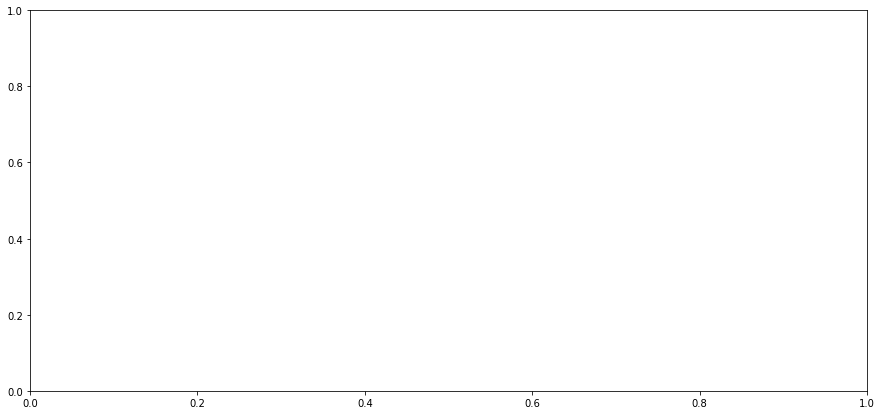

In [64]:
fig, ax = matplot.subplots(figsize=(15,7))
# use unstack()
merged_conf_0510_count = merged_conf_0510.groupby(['Year']).agg({'Entity':'count', 'price':'mean'})
print(merged_conf_0510_count)


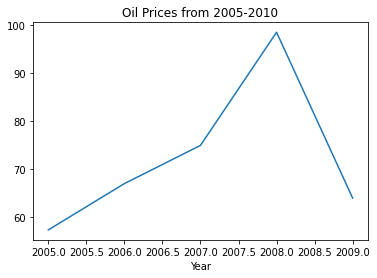

In [68]:
matplot.plot(merged_conf_0510_count.index, merged_conf_0510_count['price'])
matplot.title('Oil Prices from 2005-2010')
matplot.xlabel('Year')
matplot.ylabel('') 
# matplot.plot(merged_conf_0510_count.index, merged_conf_0510_count['Entity'])
matplot.show()

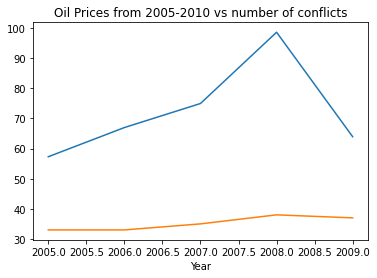

In [70]:
matplot.plot(merged_conf_0510_count.index, merged_conf_0510_count['price'])
matplot.title('Oil Prices from 2005-2010 vs number of conflicts')
matplot.xlabel('Year')
matplot.ylabel('') 
matplot.plot(merged_conf_0510_count.index, merged_conf_0510_count['Entity'])
matplot.show()